# Assignment 2

# 1. Regression

In this assignment, you will explore the California Housing Prices dataset. Your task is to apply various regression techniques, specifically Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression, to predict housing prices.


### Dataset
We will use the "California Housing Prices" Xset from the `sklearn.Xsets` module for ease of access. 

### Objectives
1. Perform exploratory X analysis (EDA) to understand the Xset.
2. Apply Kernel Ridge Regression (KRR) with different hyperparameters and analyze the results.
3. Implement Bayesian Linear Regression and discuss the posterior distributions.
4. Explore Gaussian Process Regression and visualize the prediction uncertainties.
5. Compare the performance of the three regression techniques and discuss your findings.

## Tasks

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.



### 1. Data Exploration and Preprocessing
- Use the knowledge you gain from previouse assignment on this dataset. 
- You do not have to repeat the visualization of the data, only remeber the important fact that you gain by analysing it. 

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We remember from assignment one that the features were affected by outliers. KRR, a modified version of regular ridge regression is especially handy for datasets that have many outliers. We saw from both the histograms and boxplots from the previous assignment that this was present. KRR are also able to capture non-linear patterns in the data, we know from the last assignment that there might exist such in our dataset. This makes it very viable for KRR. We also know that many of the features were correlated, which the regularization parameter will help prevent the model from overfitting the data. KRR also makes sense since it enables us with flexibility when choosing the kernel. For the sake of trying different ones, i chose three; linear, rbf and laplacian. 

#### 2. Kernel Ridge Regression (KRR)
- Apply KRR to the dataset.
- Experiment with different kernels and regularization parameters.
- Analyze the performance and discuss how different hyperparameters impact the model.

In [24]:
# Using Kernel Ridge can make a lot of sense when working with the california housing prices dataset since, in the first assignment we saw that there were significant outliers present in the data. Even though these in most cases could be handled by i.e. taking logarithm of the target variable, it is still a good idea to use a model that is robust to outliers. 

def kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, kernel):
    kr = KernelRidge(kernel=kernel, alpha=0.1, gamma=0.1)
    kr.fit(X_train_scaled, y_train)
    y_pred = kr.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse
    
linear_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'linear')
rbf_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'rbf')
laplacian_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'laplacian')

print(f"RMSE for linear kernel: {linear_rmse}")
print(f"RMSE for rbf kernel: {rbf_rmse}")
print(f"RMSE for laplacian kernel: {laplacian_rmse}")

RMSE for linear kernel: 2.2052818990051413
RMSE for rbf kernel: 0.5697829128116272
RMSE for laplacian kernel: 0.4720307071687382


We see that the linear kernel did not perform the best, so we can confirm our suspicion on the fact that there might be non-linear patterns present in our data. This is especially the case since the RBF and laplacian performed significantly better. The RBF and Laplacian can handle more complex relationships by mapping the original features into higher-dimensional spaces where the linear separation is possible. 

#### 3. Bayesian Linear Regression
- Implement Bayesian Linear Regression. You can use  Bayesian Ridge Regression function from Scikit-Learn.
- Visualize the posterior distributions of the coefficients (at least one coefficient).
- Discuss the insights gained from the posterior analysis.

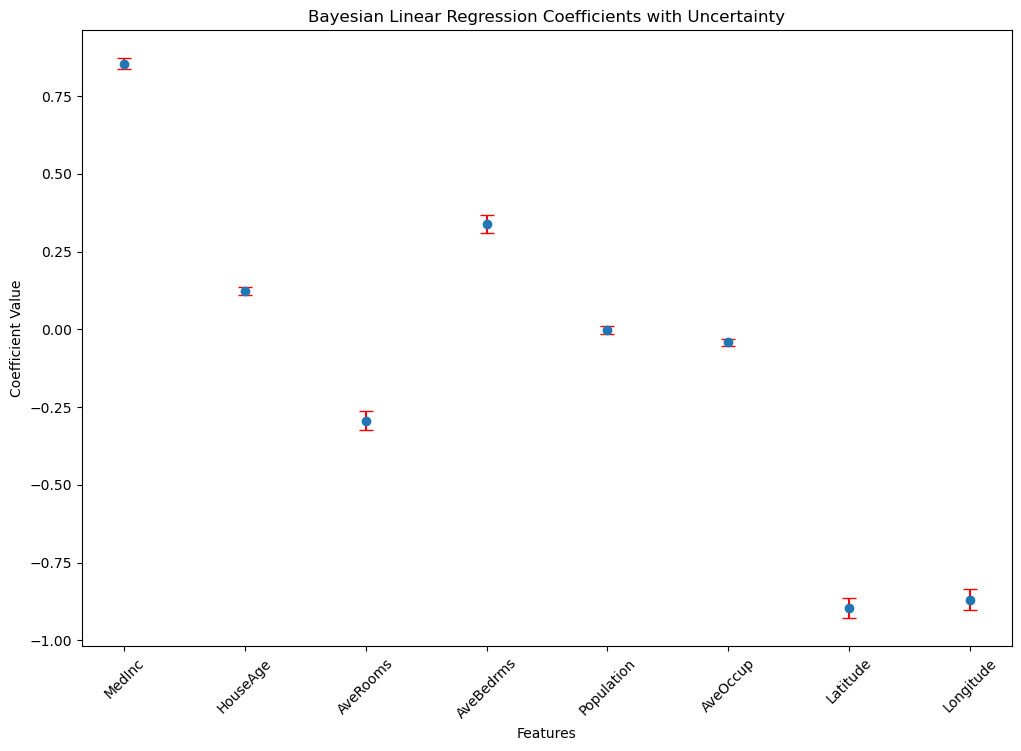

In [25]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef, #  to approximate the 95% confidence interval for the coefficients.  95% of the values lie within approximately 1.96 standard deviations from the mean.(coefficient - 1.96 * std_dev)  
             fmt='o', 
             ecolor='r',
             capsize=5)
plt.xticks(range(len(bayesian_model.coef_)), data.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.show()

As we can see from the above plot from the Bayesian Linear Regression with uncertainty, there are both positive and negative coefficients associated with the features. We also see some of them are more confident than others, but generally these are very small bands which indicates that our variables explain the relationships well. Overall we see that Median Income and geographical location has the largest impact on housing prices acording to this model. 

#### 4. Gaussian Process Regression
- Apply Gaussian Process Regression to the Xset.
- Visualize the prediction uncertainties.
- Discuss how the Gaussian Process handles uncertainty in predictions.

In [26]:
from sklearn.gaussian_process.kernels import Matern

kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5) # nu controls the smoothness of the function drawn from the Gaussian process.
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42) # Gaussian Process Regression (GPR) as a non-parametric approach that can be used to solve regression problems. Especially useful for the California Housing dataset since our previous models indicate it is not linearly seperable. Also, GPR can be used to estimate the uncertainty of the predictions, which is useful for the California Housing dataset since we have a lot of outliers.

gpr_model.fit(X_train_scaled, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test_scaled, return_std=True)

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

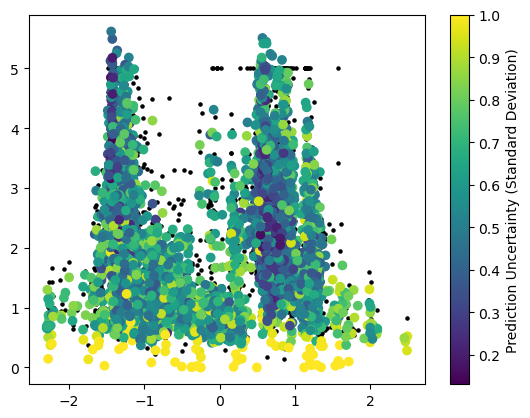

In [44]:
# Select one feature for visualization (for example, the first feature)
feature_index = 7
selected_feature = X_test_scaled[:, feature_index]

# Plot
plt.scatter(selected_feature, y_test, color='black', s = 5 ,label='Actual')

scatter = plt.scatter(selected_feature, y_pred_gpr,  c=std_dev_gpr, cmap='viridis', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel(data.feature_names[feature_index])
plt.ylabel('Target')
plt.title('Model Predictions vs Actual (One Feature Visualization)')
plt.legend()
plt.show()

From the above plot we can discern that for values close to 1, the model is rather uncertain about it's predictions. This could be caused by insufficient training data for this specific region or more specifically an outliers which are clustered around the same values.  

Values that are closer to 0 are predictions the model is more certain of - these regions has the inverse argument of the above. We have more training data, therefore the model performs increasingly well for these areas.  

There seems to be a specific pattern in the above plot -> clusters of data are more likely to be certain than where the clusters are small. Generally for negative values on the x axis we see a higher association on the y-axis for predictions the model is very certain about. For positive values on the x-axis, we see that the majority of certain predictions are clustered towards the lower middle part of the y-axis.  

Overall the Gaussian Process regression provides us with specific insight into each prediction of it's certainty or uncertainty. We are also able to form a specific structure over the data from this. 

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.

Overall we have established that the California Housing Prices dataset consists of significant outliers. We have also confirmed our suspicion of the fact that the dataset is not linearly seperable. This is crucial information, since the models we impose later on in this part of the assigment, har non-linear models, both the RBF and Laplacian from KRR, but also Bayesian Linear Regression and Gaussian Process regresssors. The important thing to take away from this is that the revelation of the data not being linearly seperable is crucial when we are performing model predictions since it has a huge effect on both computation (since we might need to select more complex models that require more computation) but also on our predictions. 

# 2. Outlier detection
In this assignment, you can choose one of the below dataset and your task is to identify the outliers in them using various machine learning techniques.


## Dataset

You can choose One of the below datasets:
1. The dataset is a small sample from the Fashion MNIST dataset with manually added outliers. The data will be provided in the form of two numpy arrays: `images` and `labels`. (Note:check for missing data)
2. You will generate your data with outliers:
    * Use NumPy to create data points that follow a normal distribution. This forms the "normal" part of your dataset. 
    * Manually add data points that are significantly different from the normal data. 
    * These points should be distant from the mean of the normal data to be considered outliers.
    * Combine the normal data points and outliers into a single dataset.

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Implement PCA (Principal Component Analysis) for dimensionality reduction and visualize the results.
3. Use K-means clustering to identify potential outliers.
4. Apply t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualization and detect anomalies.
5. (Optional) Design and train an autoencoder and use reconstruction error to find outliers.
6. Compare the effectiveness of the above methods in outlier detection.

## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Load the dataset and visualize some images.
- Plot the distribution of the different classes in the dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


data = np.load('fmnist_710.npz')
images, labels  = data['x'] , data['y']

In [3]:
train_images = images.astype('float32') / 255


# Flatten images
X = train_images.reshape((train_images.shape[0], -1))

X.shape

(1210, 784)

#### 2. PCA for Dimensionality Reduction
- Implement PCA to reduce the dimensionality of the dataset.
- Visualize the data in the reduced dimension space.

In [8]:
# Apply PCA for Dimensionality Reduction and Outlier Detection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error_pca = np.sum((X - X_reconstructed) ** 2, axis=1)
outliers_pca = reconstruction_error_pca > np.percentile(reconstruction_error_pca, 95)

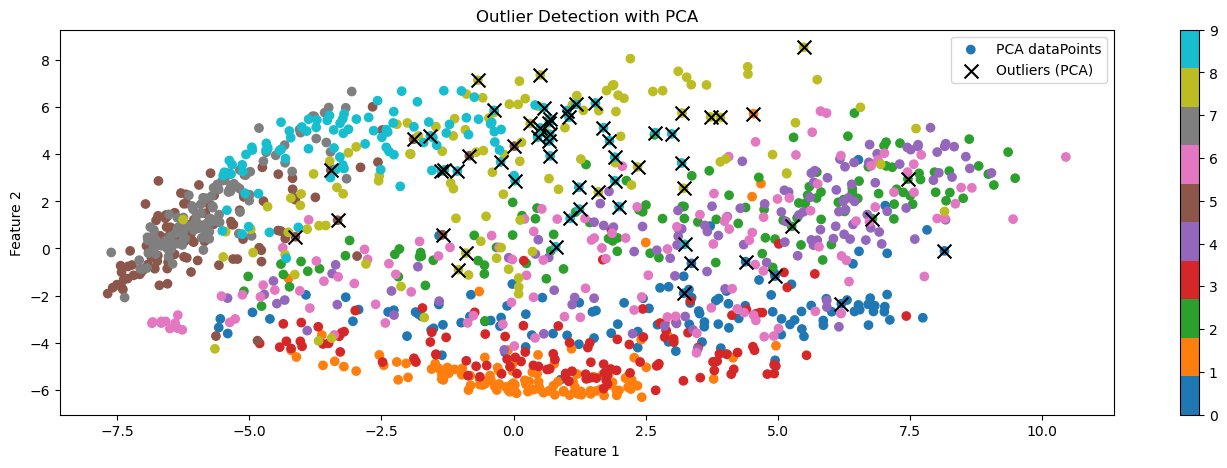

In [9]:
# Visualization
plt.figure(figsize=(17, 17))

# Visualization for PCA
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=labels, label='PCA dataPoints', cmap='tab10')
plt.scatter(X_pca[outliers_pca, 0], X_pca[outliers_pca, 1], c='k', marker='x', s=100,label='Outliers (PCA)')
plt.title('Outlier Detection with PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()

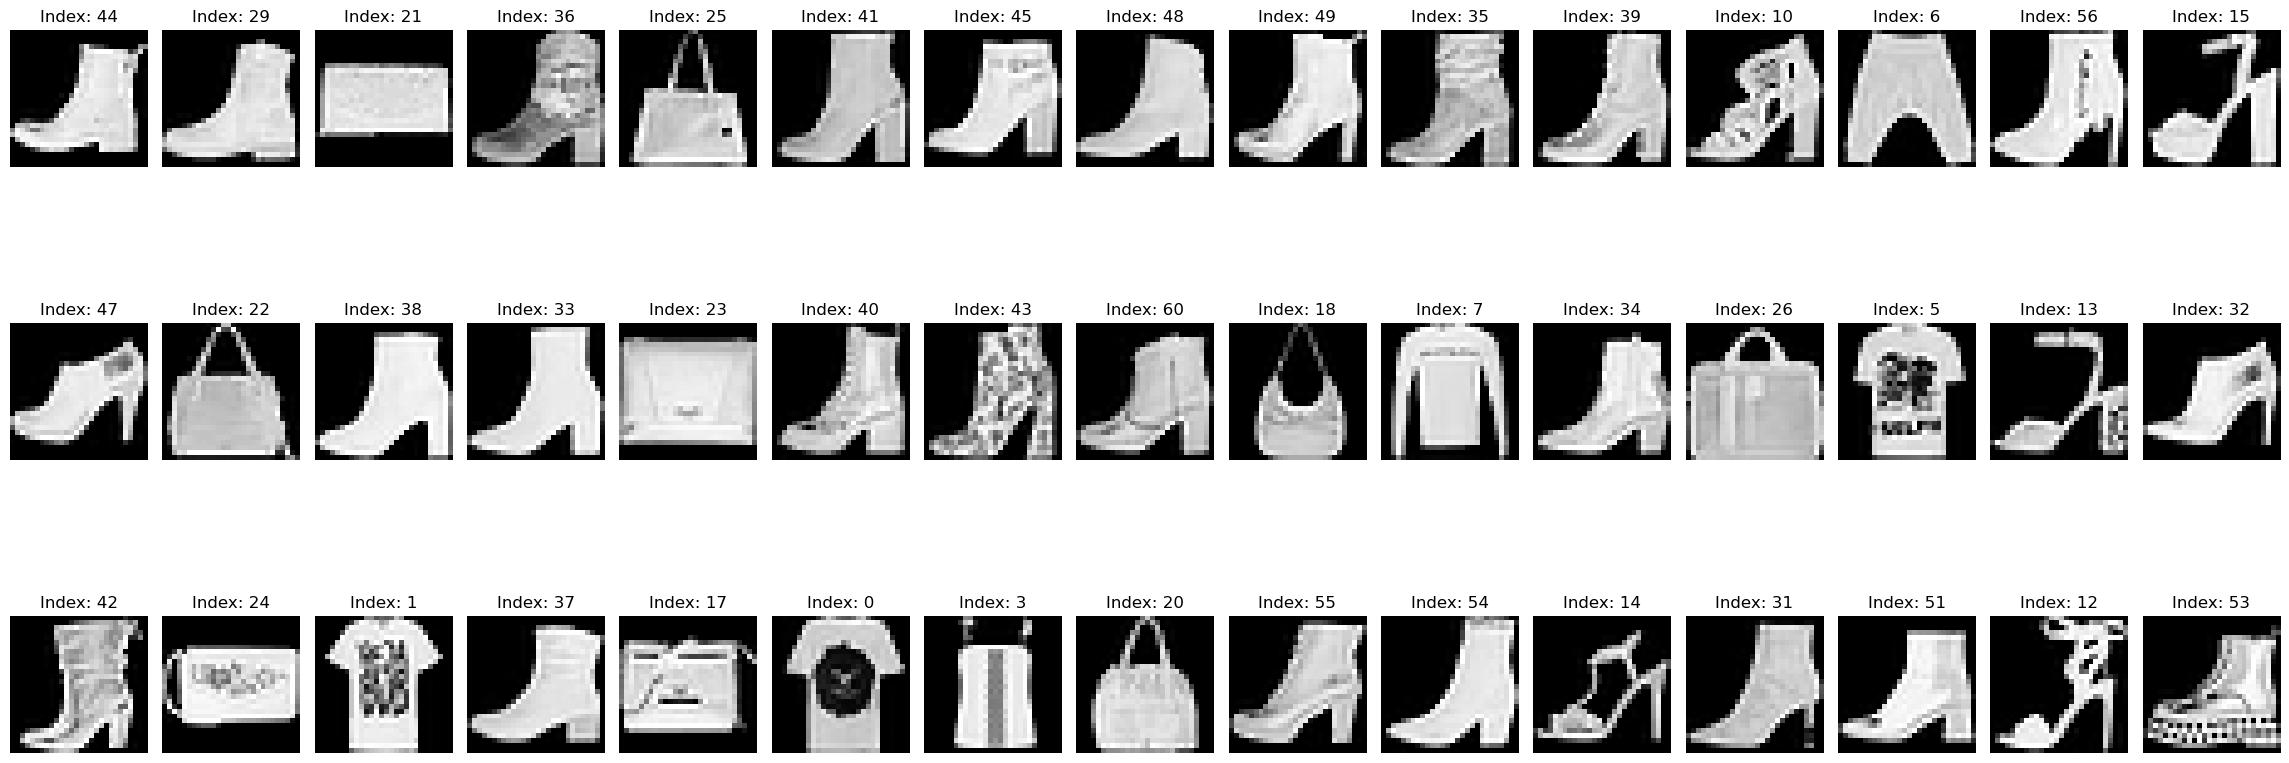

In [10]:
img = X[outliers_pca ]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 3. K-means Clustering
* K-means Clustering
    - Apply K-means clustering on the dataset.
    - Identify clusters that potentially contain outliers.

/Users/asger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


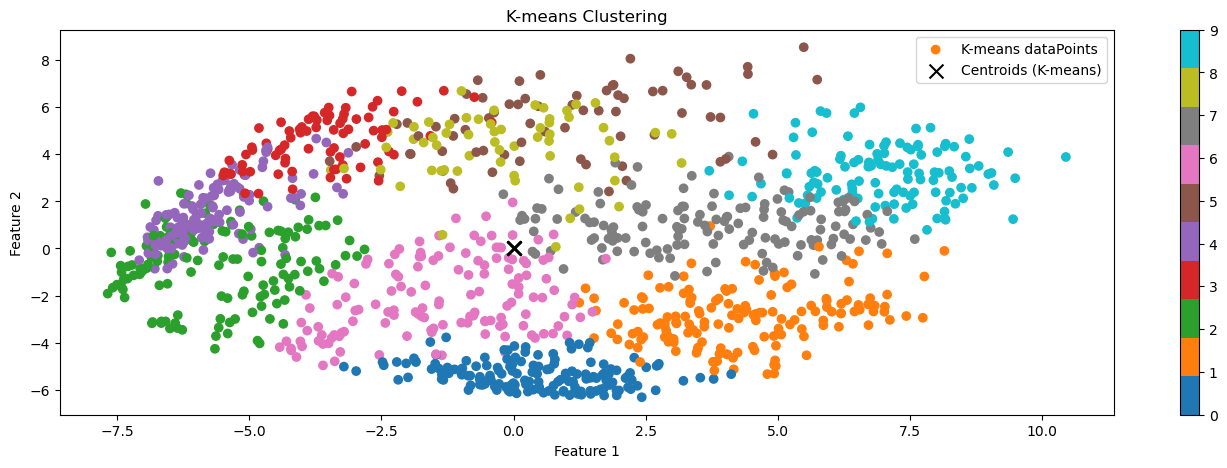

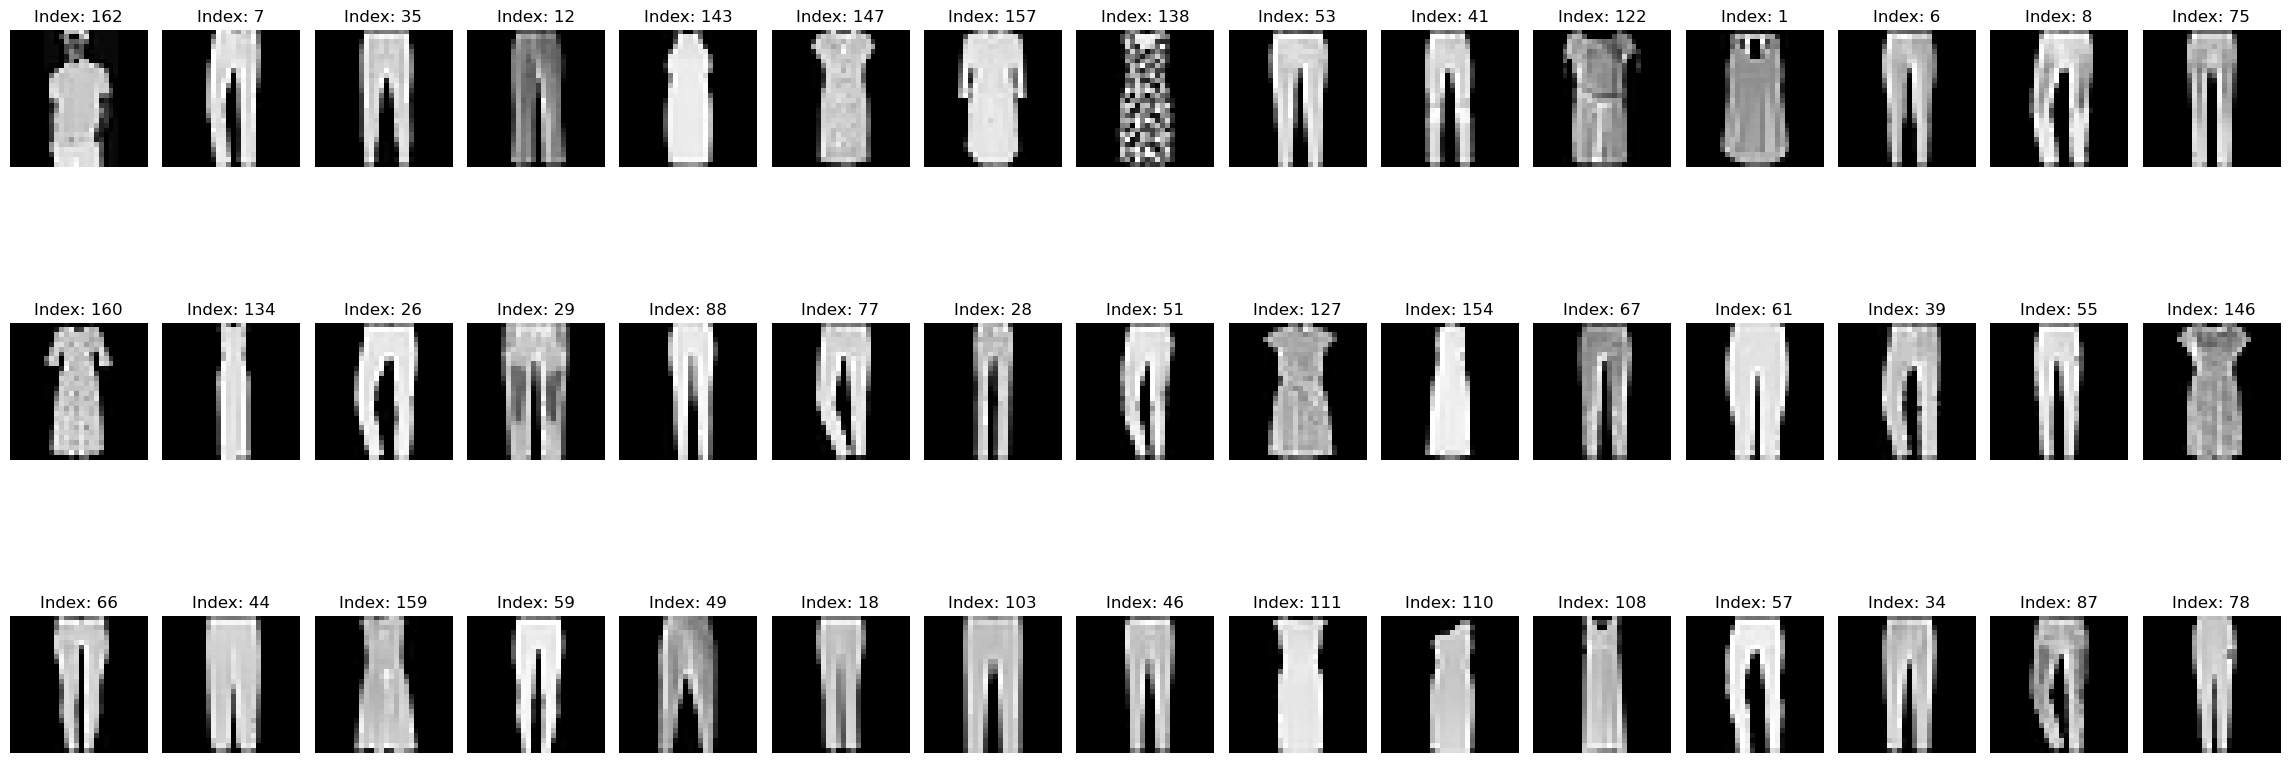

In [13]:
# Applying k-means clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(17, 17))

# Visualization for K-means
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y_kmeans, label='K-means dataPoints', cmap='tab10')
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=100,label='Centroids (K-means)')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()

img = X[y_kmeans == 0]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 5. t-SNE for Visualization
- Apply t-SNE to the dataset and visualize the results.
- Discuss how t-SNE helps in identifying outliers.

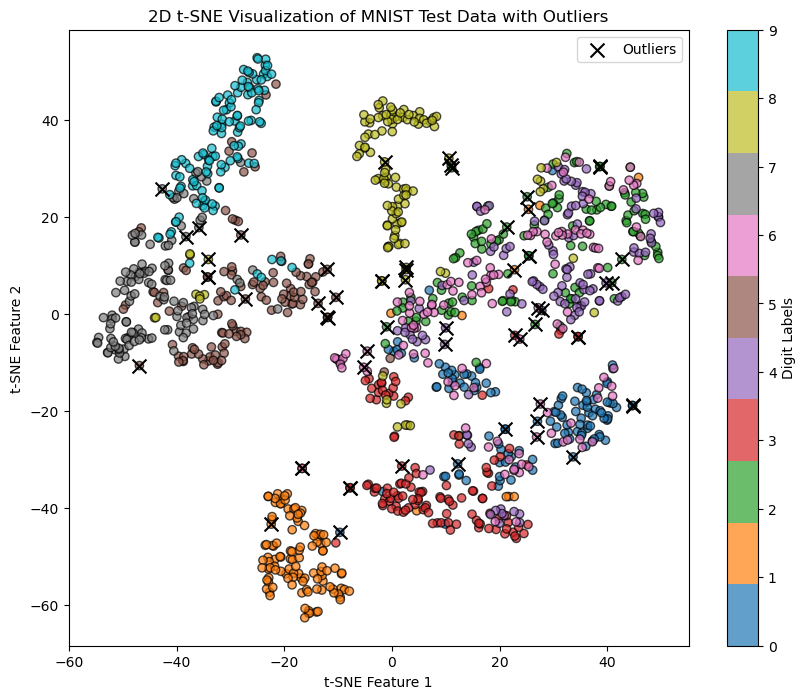

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, 
            perplexity=15,
            n_iter=1000, random_state=42)

X_tsne = tsne.fit_transform(X)  # Using a subset for quicker execution



# Outlier Detection: Calculate the distance from each point to its neighbors
distances = np.sqrt(((X_tsne[:, np.newaxis, :] - X_tsne[np.newaxis, :, :]) ** 2).sum(axis=2)) # computes the distance between each pair 
k_nearest_distances = np.sort(distances, axis=1)[:, 1:6]  # selects the distances to the five nearest points (excluding the distance to the point itself, which is zero).
outlier_scores = k_nearest_distances.mean(axis=1) #The mean distance to these nearest point
outliers = outlier_scores > np.percentile(outlier_scores, 95)  # Top 5% as outliers

# 2D Visualization of t-SNE results with Outliers
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='tab10',
            edgecolor='k', alpha=0.7)
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1], c='k', marker='x', s=100, label='Outliers')
plt.title('2D t-SNE Visualization of MNIST Test Data with Outliers')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Digit Labels')
plt.legend()
plt.show()

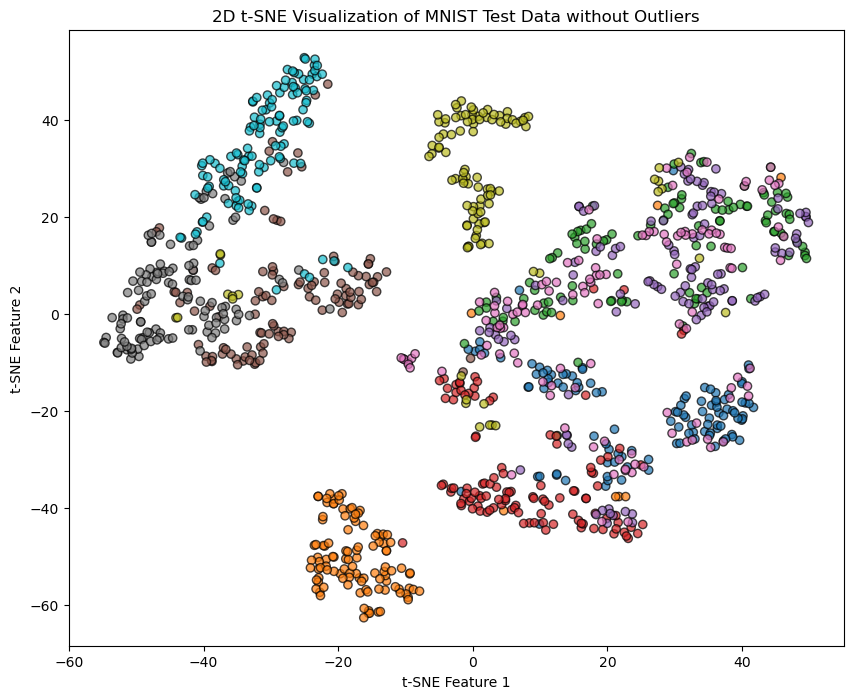

In [12]:

# 2D Visualization of t-SNE results without Outliers
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[~outliers, 0], X_tsne[~outliers, 1], c=labels[~outliers],
            cmap='tab10',
            edgecolor='k', alpha=0.7)
plt.title('2D t-SNE Visualization of MNIST Test Data without Outliers')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Digit Labels')
plt.show()

#### 7. Comparative Analysis
- Compare the results of the models you chose to study.
- Discuss the effectiveness and limitations of each method in outlier detection.

## How to Submit
- First, a Jupyter Notebook containing all the code, comments, and analysis.
- Second report cells in the same Jupyter Notebook, summarizing your findings, including results and a discussion of the results.
- Finally convert the Jupyter Notebook to PDF.
- **Don't write your name**.
- Upload the PDF into convas.

## Evaluation Criteria (peer grading)
- Correctness of the implementation of the models. (2 points)
- Quality of the EDA and preprocessing steps. (1 point)
- Depth of the analysis in comparing the models.(1 point)
- Clarity and organization of the submitted report and Jupyter Notebook. (1 point)

